# Module 2 Exercises

In this notebook, we will put our newly developed Python skills to use. We will analyze a dataset of ICU patients from the MIMIC-II database.


In [1]:
from helpers import *

## 0. Import libraries and Read in data

#### TODO
First, import the following libraries:
- `pandas` with an alias `pd`
- `matplotlib.pyplot` with an alias `plt`
- `seaborn` with an alias `sns`

Then, read in the dataset `"../data/pna_30_day_mortality.csv"` and save it as `df`.

In [2]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

In [3]:
df = pd.read_csv("../data/pna_30_day_mortality.csv")

# Exploratory data analysis

#### TODO
Our first analysis will be exploring the dataset using visualization and summary statistics. We will answer questions like:
- What are the demographics of the patient population?
- How many patients died in the hospital? How long did patients survive after discharge?
- How many patients had pneumonia? Does the subpopulation of pneumonia cases differ at all from the rest of the population?

But first, you may need to do some additional data transformations to get the necessary variables. Start by exploring the dataset and getting familiar with it. What do each of the columns mean? Which columns would we use to answer the questions above? Do you need to calculate any more columns?

In [4]:
df.head()

,subject_id,hadm_id,disch_dt,dod,sex,ethnicity_descr,age_at_discharge,age_at_discharge_binned,pna,time_discharge_to_death,mortality_30_day
0,56,28766,2644-01-23 00:00:00,2644-01-23 00:00:00,F,WHITE,90.7205,91+,0,0,1
1,37,18052,3264-08-19 00:00:00,3265-12-31 00:00:00,M,WHITE,68.9863,66-90,1,499,0
2,78,15161,2778-03-27 00:00:00,2781-03-11 00:00:00,M,BLACK/AFRICAN AMERICAN,48.6658,36-65,0,1080,0
3,67,35878,2976-11-29 00:00:00,2976-11-29 00:00:00,M,WHITE,73.5397,66-90,0,0,1
4,3,2075,2682-09-18 00:00:00,2683-05-02 00:00:00,M,WHITE,76.6055,66-90,0,226,0


# 1. Ethnicity
What are the counts in the `ethnicity_descr` column? Calculate the values, then plot them.

In [5]:
# Getting counts: Use df.groupby
df.groupby("ethnicity_descr").size()

ethnicity_descr
AMERICAN INDIAN/ALASKA NATIVE                 3
ASIAN                                        86
ASIAN - CHINESE                               5
ASIAN - VIETNAMESE                            1
BLACK/AFRICAN AMERICAN                      474
BLACK/CAPE VERDEAN                            2
BLACK/HAITIAN                                 2
HISPANIC OR LATINO                           71
HISPANIC/LATINO - PUERTO RICAN                3
MULTI RACE ETHNICITY                          2
NATIVE HAWAIIAN OR OTHER PACIFIC ISLAND       2
OTHER                                        78
PATIENT DECLINED TO ANSWER                   52
UNABLE TO OBTAIN                             18
UNKNOWN/NOT SPECIFIED                       730
WHITE                                      3544
WHITE - RUSSIAN                               1
dtype: int64

In [6]:
# Plot
ethnicity_descr_hint

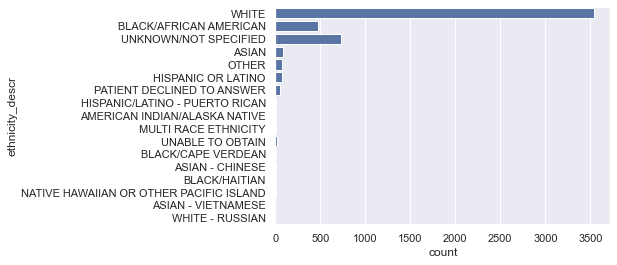

In [7]:
# Seaborn countplot
sns.countplot(y="ethnicity_descr", data=df, color="C0")
plt.savefig("media/ethnicity_descr_counts.png", bbox_inches = "tight")

# 2: Age at discharge
What is the distribution of patient ages at the time of discharge? First calculate summary statistics, then plot the values using an appropriate method.

In [8]:
# RUN CELL TO SEE QUIZ
age_at_discharge_mc

In [9]:
# RUN CELL TO SEE HINT
age_at_discharge_viz_hint

In [10]:
df["age_at_discharge"].describe()

count    5074.000000
mean       70.286260
std        16.333053
min         0.000000
25%        61.141075
50%        73.412350
75%        82.389050
max       105.421900
Name: age_at_discharge, dtype: float64

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


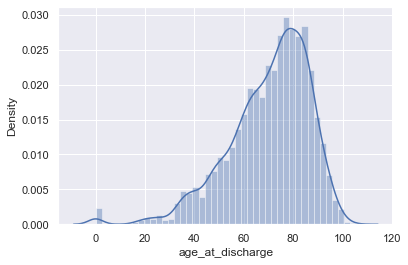

In [11]:
sns.distplot(df["age_at_discharge"])
plt.savefig("./media/age_at_discharge_hist.png")

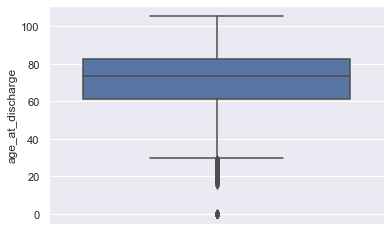

In [12]:
sns.boxplot(y="age_at_discharge", data=df)
plt.savefig("./media/age_at_discharge_boxplot.png")

# 3. In-hospital mortality 
Next let's study how many patients died in the hospital. However, our dataset doesn't tell us right away whether patients died in the hospital or not. 

## 3.1
Which columns Could tell us whether a patient died in the hospital? There's more than one way we could do this, so select all that apply.

In [13]:
# RUN CELL TO SEE QUIZ
mortality_cols_quiz 

In [14]:
df.columns

Index(['subject_id', 'hadm_id', 'disch_dt', 'dod', 'sex', 'ethnicity_descr',
       'age_at_discharge', 'age_at_discharge_binned', 'pna',
       'time_discharge_to_death', 'mortality_30_day'],
      dtype='object')

## 3.2
Add a column `in_hospital_mortality` which is a binary indicator of whether they died in the hospital.

**Hint**: You could either represent this as an integer (`0` or `1`) or a boolean (`True` or `False`).

In [15]:
# RUN CELL TO SEE HINT
in_hospital_mortality_hint

In [16]:
# Option 1: Use time_to_discharge_death
df["in_hospital_mortality"] = (df["time_discharge_to_death"] == 0)

In [17]:
# Option 2: Compare disch_dt and dod
df["in_hospital_mortality"] = (df["disch_dt"] == df["dod"])

In [18]:
df["in_hospital_mortality"].mean()

0.3285376428852976

In [19]:
df.head()

,subject_id,hadm_id,disch_dt,dod,sex,ethnicity_descr,age_at_discharge,age_at_discharge_binned,pna,time_discharge_to_death,mortality_30_day,in_hospital_mortality
0,56,28766,2644-01-23 00:00:00,2644-01-23 00:00:00,F,WHITE,90.7205,91+,0,0,1,True
1,37,18052,3264-08-19 00:00:00,3265-12-31 00:00:00,M,WHITE,68.9863,66-90,1,499,0,False
2,78,15161,2778-03-27 00:00:00,2781-03-11 00:00:00,M,BLACK/AFRICAN AMERICAN,48.6658,36-65,0,1080,0,False
3,67,35878,2976-11-29 00:00:00,2976-11-29 00:00:00,M,WHITE,73.5397,66-90,0,0,1,True
4,3,2075,2682-09-18 00:00:00,2683-05-02 00:00:00,M,WHITE,76.6055,66-90,0,226,0,False


In [20]:
# Check your answer here
test_in_hospital_mortality.test(df)

That is correct!


## 3.3
What proprotion of patients died in the hospital? Calculate the value then plot the raw counts.

In [21]:
# RUN CELL TO SEE QUIZ
prop_pt_mortality_quiz

In [22]:
df["in_hospital_mortality"].mean()

0.3285376428852976

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='in_hospital_mortality', ylabel='count'>

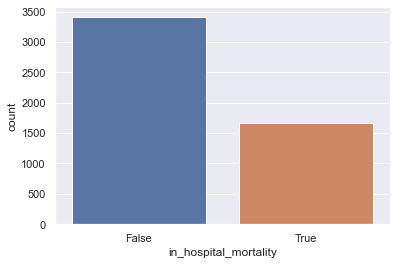

In [23]:
sns.countplot(df["in_hospital_mortality"])

## 3.4
What is the relationship between age at discharge and in-hospital mortality? Use the ordinal column `"age_at_discharge_binned"` to calculate the proportion of individuals in each bin who died in the hospital. Then plot the values.

In [24]:
# RUN CELL TO SEE HINT
age_at_discharge_mortality_hint

In [25]:
# RUN CELL TO SEE QUIZ
age_at_discharge_mortality_quiz

In [26]:
df.groupby("age_at_discharge_binned")["in_hospital_mortality"].mean()

age_at_discharge_binned
18-35    0.358779
36-65    0.312010
66-90    0.321662
91+      0.395639
<18      0.941176
Name: in_hospital_mortality, dtype: float64

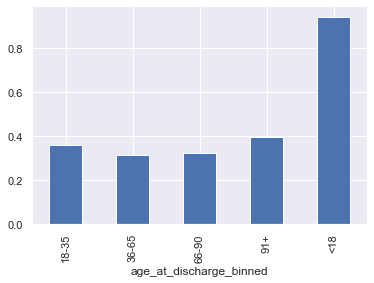

In [27]:
df.groupby("age_at_discharge_binned")["in_hospital_mortality"].mean().plot.bar()
plt.savefig("./media/age_at_discharge_proportions.png")

# 4. Pneumonia
Pneumonia is a common infection and serious comorbidity for ICU patients. We'll explore pneumonia throughout the class, beginning with the next few questions.

## 4.1
What proportion of patients had pneumonia during their hospitalization? Calculate the proportion and plot the counts.

In [28]:
# RUN CELL TO SEE QUIZ
pna_prop

In [29]:
df["pna"].mean()

0.1998423334647221

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pna', ylabel='count'>

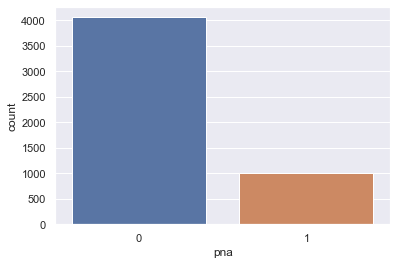

In [30]:
sns.countplot(df["pna"])

## 4.2
The column `time_discharge_to_death` tells us how many days there were between when the patient discharged and when they died. What is the distribution of time to death among patients who did/did not have pneumonia? Try a few different methods for comparing the two groups. Do the distributions differ?

In [31]:
# RUN CELL TO SEE HINT
time_to_death_viz_hint

In [32]:
# RUN CELL TO SEE QUIZ
time_to_death_mean_quiz

In [33]:
df.groupby("pna")["time_discharge_to_death"].describe()

,count,mean,std,min,25%,50%,75%,max
pna,,,,,,,,
0,4060.0,398.871182,563.235274,-177.0,0.0,113.5,607.00,2735.0
1,1014.0,254.119329,438.026478,-27.0,0.0,35.0,321.25,2533.0


In [34]:
# Plot time_discharge_to_death by pneumonia


<AxesSubplot:xlabel='pna', ylabel='time_discharge_to_death'>

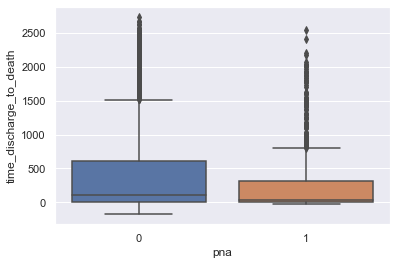

In [35]:
# Visualization 1: Boxplot
sns.boxplot(x="pna", y="time_discharge_to_death", data=df)
# plt.savefig("./media/time_discharge_to_death_boxplot.png")

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Pneumonia positive')

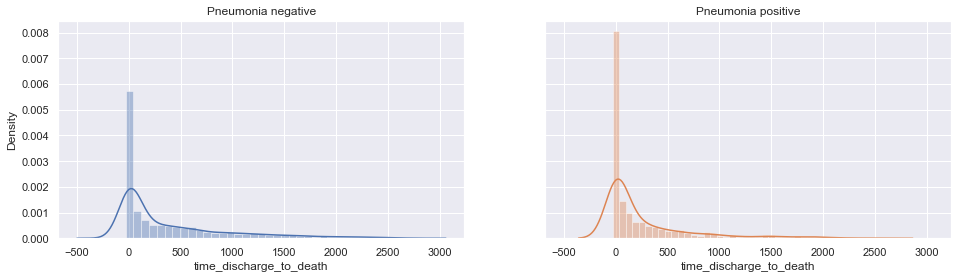

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4), sharex=True, sharey=True)
sns.distplot(df.query("pna == 0")["time_discharge_to_death"], ax=ax1)
ax1.set_title("Pneumonia negative")
sns.distplot(df.query("pna == 1")["time_discharge_to_death"], ax=ax2, color="C1")
ax2.set_title("Pneumonia positive")
# plt.savefig("media/time_to_death_hist.png", bbox_inches = "tight")

## 4.3
The [relative risk](https://en.wikipedia.org/wiki/Relative_risk) is a statistic which tells us how likely an outcome is to occur in one group versus another. For example, the outcome might be in-hospital mortality and you could compare between different levels of age to see if there's a difference between older and younger individuals. 

Calculate the relative risk of in-hospital mortality for patients with pneumonia against patients without pneumonia and assign it the name `rr`. It can be calculated as the proportion of pneumonia positive patients who died over the proportion of pneumonia negative patients who died.

How would you interpret the results? 

In [37]:
# RUN CELL TO SEE QUIZ
in_hospital_mortality_rr_quiz

In [38]:
# RUN CELL TO SEE QUIZ
in_hospital_mortality_rr_interpretation_quiz

In [39]:
rr = df.groupby("pna")["in_hospital_mortality"].mean()[1] / df.groupby("pna")["in_hospital_mortality"].mean()[0]
rr

1.272399840961714

In [40]:
test_in_hospital_mortality_rr = FreeTextTest(
    "What is the relative risk of in-hospital mortality for pneumonia positive vs pneumonia negative patients?</br>Round to 2 decimals.",
    answer=1.27

)
test_in_hospital_mortality_rr

In [41]:
MultipleChoiceQuiz("The interpretation of the relative risk is:</br>Patients with pneumonia are ___ ___ than patients without pneumonia to die in the hospital.", 
                   answer=" 1.27 times more likely",
                   options=["1.27 times less likely", "Similarly likely"]
                  )